# Kurapati Venkatesh
# 09012021
# Topic: Association Rules

# ---------------------------------------------------------------------------

## 4. A Mobile Phone manufacturing company wants to launch its three brand new phone into the market, but before going with its traditional marketing approach this time it want to analyze the data of its previous model sales in different regions and you have been hired as an Data Scientist to help them out, use the Association rules concept and provide your insights to the company’s marketing team to improve its sales.

## -----------------------------------------------------------------------------------

### Business objective: To help the Mobile Phone company in identifying patterns based on historical data and provide ways the business can launch their models, apply Association Rule Algorithm, explain the rules, and visualize the graphs for clear understanding of solution.

## -------------------------------------------------------------------------------------------

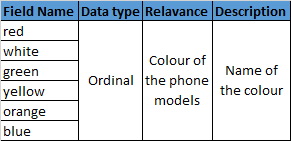

Import libraries:

In [1]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

Load Dataset:

In [5]:
df1 = pd.read_csv("G:\\360digit\\assignments meterial\\association rules\\myphonedata.csv", sep=',') 
df = df1[df1.columns[3:9]]

Print top 5 rows: 

In [7]:
df

,red,white,green,yellow,orange,blue
0,1,1,1,0,0,0
1,0,1,0,0,1,0
2,0,1,0,0,0,1
3,1,1,0,0,1,0
4,1,0,0,0,0,1
5,0,1,0,0,0,1
6,1,0,0,0,0,1
7,1,1,0,0,0,1
8,0,0,1,0,0,0
9,1,1,0,0,0,1


Each row of the dataset represents phones with color items that were purchased in the same company.

There are only 6 color models in total that make up the entire dataset.

In [8]:
df.describe()

,red,white,green,yellow,orange,blue
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,0.545455,0.636364,0.181818,0.090909,0.181818,0.545455
std,0.522233,0.504525,0.404520,0.301511,0.404520,0.522233
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   red     11 non-null     int64
 1   white   11 non-null     int64
 2   green   11 non-null     int64
 3   yellow  11 non-null     int64
 4   orange  11 non-null     int64
 5   blue    11 non-null     int64
dtypes: int64(6)
memory usage: 656.0 bytes


### Applying Apriori:

In [11]:
freq_items = apriori(df, min_support=0.0075, use_colnames=True, verbose=1)
freq_items

Processing 12 combinations | Sampling itemset size 4


,support,itemsets
0,0.545455,(red)
1,0.636364,(white)
2,0.181818,(green)
3,0.090909,(yellow)
4,0.181818,(orange)
5,0.545455,(blue)
6,0.363636,"(white, red)"
7,0.090909,"(green, red)"
8,0.090909,"(orange, red)"
9,0.363636,"(red, blue)"


#### Mining Association Rules:

#### Most Frequent item sets based on support:

In [12]:
freq_items.sort_values('support', ascending = False, inplace = True)

<ipython-input-15-22745a47e8f4>:1: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.bar(x = list(range(0, 11)), height = freq_items.support[0:11], color ='rgmyk')


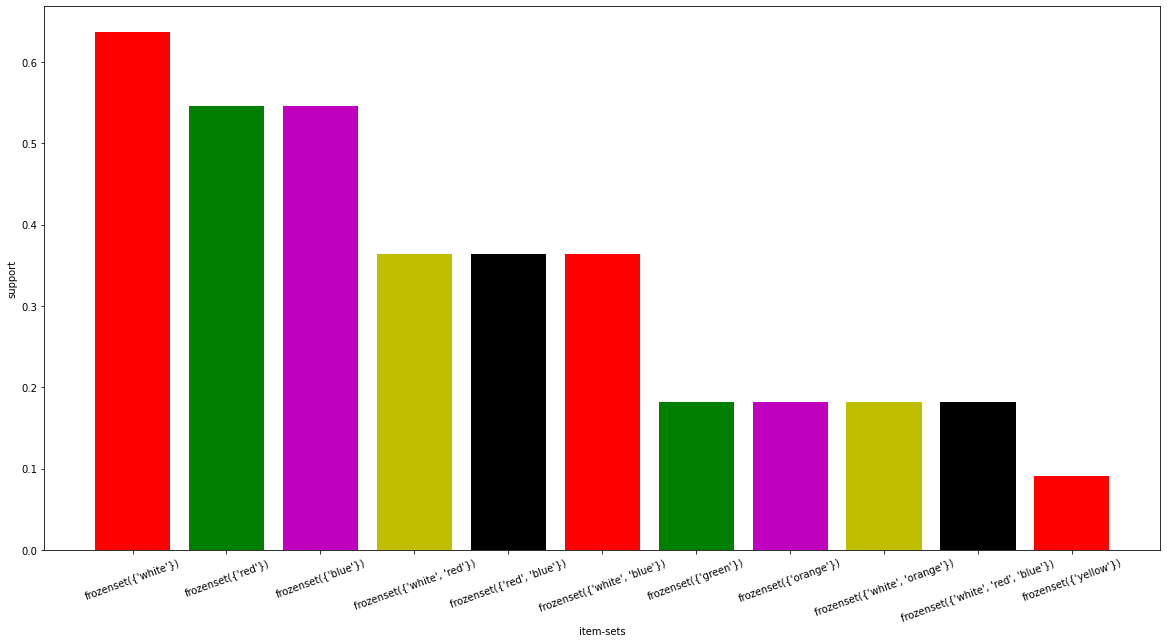

In [15]:
plt.bar(x = list(range(0, 11)), height = freq_items.support[0:11], color ='rgmyk')
plt.xticks(list(range(0, 11)), freq_items.itemsets[0:11], rotation=20)
plt.xlabel('item-sets')
plt.ylabel('support')
plt.show()
plt.rcParams["figure.figsize"]= 15, 5

Among all colors, white is the most preffered and purchased color model.

In [16]:
rules = association_rules(freq_items, metric = "lift", min_threshold = 1)
rules.head(20)
rules.sort_values('lift', ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
13,(red),"(white, green)",0.545455,0.090909,0.090909,0.166667,1.833333,0.041322,1.090909
8,"(white, green)",(red),0.090909,0.545455,0.090909,1.000000,1.833333,0.041322,inf
11,(white),"(green, red)",0.636364,0.090909,0.090909,0.142857,1.571429,0.033058,1.060606
16,(white),"(orange, red)",0.636364,0.090909,0.090909,0.142857,1.571429,0.033058,1.060606
6,(white),(orange),0.636364,0.181818,0.181818,0.285714,1.571429,0.066116,1.145455
15,"(orange, red)",(white),0.090909,0.636364,0.090909,1.000000,1.571429,0.033058,inf
7,(orange),(white),0.181818,0.636364,0.181818,1.000000,1.571429,0.066116,inf
10,"(green, red)",(white),0.090909,0.636364,0.090909,1.000000,1.571429,0.033058,inf
9,"(white, red)",(green),0.363636,0.181818,0.090909,0.250000,1.375000,0.024793,1.090909
14,"(white, red)",(orange),0.363636,0.181818,0.090909,0.250000,1.375000,0.024793,1.090909


##### If all the ancedent items are purchased, then with confidence percentage, the consequent items will also be purchased.

The result of association analysis shows which item is frequently purchased with other items.

## Analysis of Rules:

##### Let's say we are ony interested in rules that satisfy the following criteria:

##### 1. at least 2 antecedents
##### 2. a confidence > 0.75
##### 3. a lift score > 1.2

###### 1.  Rule 6 indicates that if orange and red color models are purchased, then with 100% confidence a white color model will also be purchased. The Antecedent Support column indicates that the rule has the support of 1 transaction, meaning that 1 person bought orange and red. 
###### 2.  The Lift Ratio indicates how likely a transaction will be found where all three color types (orange, red and white) are purchased, as compared to the entire transactions. In other words, the Lift Ratio is the Confidence divided by the value for Support for Consequent. 

##### --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Visualizing results:

#### 1. Support vs Confidence:

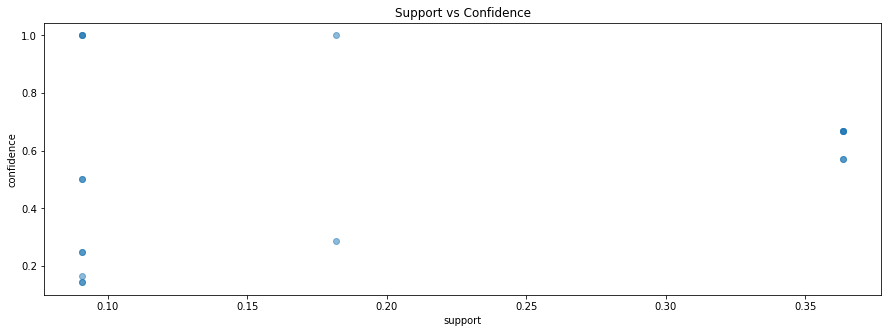

In [18]:
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

###### Above Scatter plot represents disperse and no correlation between Support and Confidence.

#### 2. Support vs Lift:

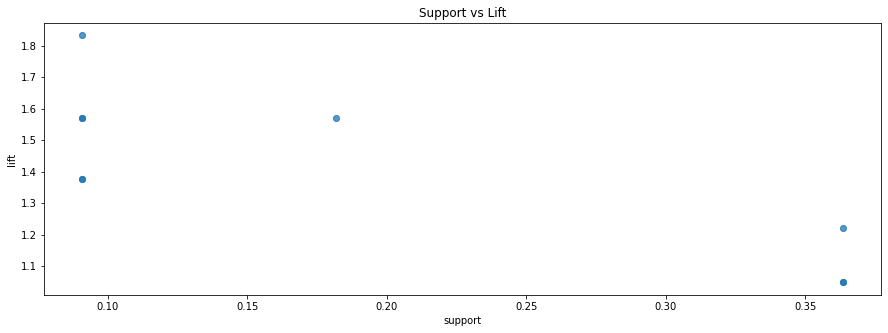

In [19]:
plt.scatter(rules['support'], rules['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

###### Above Scatter plot represents disperse and no correlation between Support and Lift. 

#### 3. Lift vs Confidence:

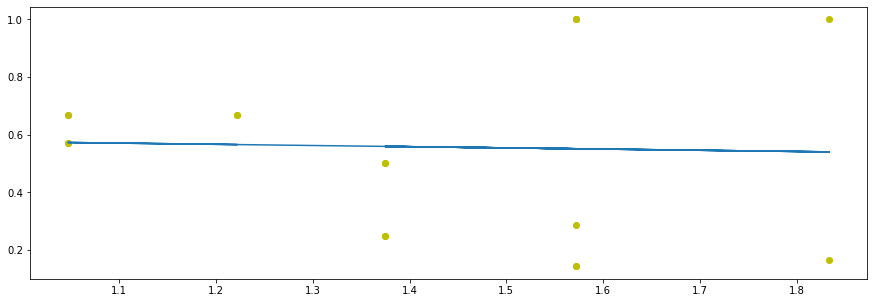

In [21]:
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'], 
 fit_fn(rules['lift']))

###### Mathematically it is not the best fit to the data. Above Scatter plot represents weak, disperse and no correlation between Lift and Confidence.

### --------------------EXTRA PART-------------------------

In [22]:
def to_list(i):
    return (sorted(list(i)))

In [23]:
ma_X = rules.antecedents.apply(to_list) + rules.consequents.apply(to_list)
ma_X = ma_X.apply(sorted)
rules_sets = list(ma_X)

In [24]:
unique_rules_sets = [list(m) for m in set(tuple(i) for i in rules_sets)]

In [25]:
index_rules = []
for i in unique_rules_sets:
    index_rules.append(rules_sets.index(i))

#### Getting rules without any redudancy: 

In [26]:
rules_no_redudancy = rules.iloc[index_rules, :]

#### Sorting them with respect to list and getting top 10 rules:

In [27]:
rules_no_redudancy.sort_values('lift', ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
8,"(white, green)",(red),0.090909,0.545455,0.090909,1.000000,1.833333,0.041322,inf
6,(white),(orange),0.636364,0.181818,0.181818,0.285714,1.571429,0.066116,1.145455
14,"(white, red)",(orange),0.363636,0.181818,0.090909,0.250000,1.375000,0.024793,1.090909
2,(red),(blue),0.545455,0.545455,0.363636,0.666667,1.222222,0.066116,1.363636
4,(white),(blue),0.636364,0.545455,0.363636,0.571429,1.047619,0.016529,1.060606
0,(white),(red),0.636364,0.545455,0.363636,0.571429,1.047619,0.016529,1.060606


##### Recommendations:

From the above table it is clear that, in most purchases the consequent is white color. So, it is Recommendable that the shop should maintain the white color models stock all the time. 